

# Автострахование: автоматизация проверки на мошенничество
![автострахование](car.png)

## Структура базы данных, применяемой для обучения и тестирования

Итоговая база данных применяемая для обучения содержит
21745 строк и 19 признаков  
база данных тестирования 7249 строк и 19 признаков аналогично  

1. **AccidentArea**: Область, где произошло ДТП.
- Возможные значения: 'Urban' (городская), 'Rural' (сельская)

2. **Sex**: Пол водителя.
- Возможные значения: 'Male' (мужчина), 'Female' (женщина)

3. **MaritalStatus**: Семейное положение водителя.
- Возможные значения: 'Single' (не женат/не замужем), 'Married' (женат/замужем), 'Divorced' (разведен/разведена)

4. **Fault**: Виновник ДТП.
- Возможные значения: 'Policy Holder' (страхователь), 'Third Party' (третьи лица)

5. **Year**: Год выпуска полиса.

6. **DriverRating**: Рейтинг водителя.
- Числовые значения, отражающие рейтинг водителя, от 1 до 5

7. **Days:Policy-Accident**: Количество дней между началом действия полиса и ДТП.

8. **Days:Policy-Claim**: Количество дней между началом действия полиса и подачей заявления.

9. **PastNumberOfClaims**: Количество предыдущих заявлений по страховым случаям.

10. **AgeOfVehicle**: Возраст автомобиля.

11. **AgeOfPolicyHolder**: Возраст страхователя.

12. **PoliceReportFiled**: Наличие полицейского отчета.
- Возможные значения: 'Yes' (да), 'No' (нет)

13. **WitnessPresent**: Присутствие свидетелей.
- Возможные значения: 'Yes' (да), 'No' (нет)

14. **AgentType**: Тип страхового агента.
- Возможные значения: 'Internal' (внутренний), 'External' (внешний)

15. **NumberOfSuppliments**: Количество прилагаемых долкументов к заявлению.

16. **AddressChange-Claim**: Количество изменений адреса до подачи заявления.

17. **NumberOfCars**: Количество автомобилей, застрахованных в полисе.

18. **BasePolicy**: Основной тип полиса:

* Liability (ответственность): Страхование ответственности покрывает убытки, нанесенные третьим лицам в результате ДТП.

* Collision (столкновение): Этот тип полиса покрывает повреждения автомобиля страхователя в результате столкновения.

* Comprehensive (комплексное): Комплексное страхование покрывает широкий спектр рисков, включая кражу, вандализм, природные бедствия и столкновения.

19. **FraudFound**: Наличие мошенничества. (предсказываемый признак)
- Возможные значения: 'Yes' (да), 'No' (нет)

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample

## Загрузка данных

In [2]:
df = pd.read_csv("./carclaims.csv")

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
print("Количество признаков изначально:",df.shape[1])
print("Количество примеров:",df.shape[0])

Количество признаков изначально: 33
Количество примеров: 15420


In [5]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


## Визуализация данных

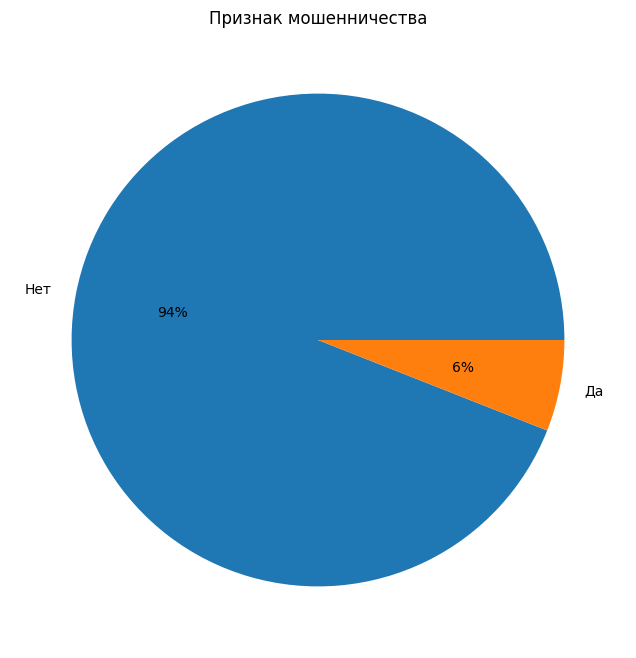

In [6]:
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=['Нет', 'Да'],  autopct='%.0f%%')
plt.title("Признак мошенничества")
plt.show()

In [7]:
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

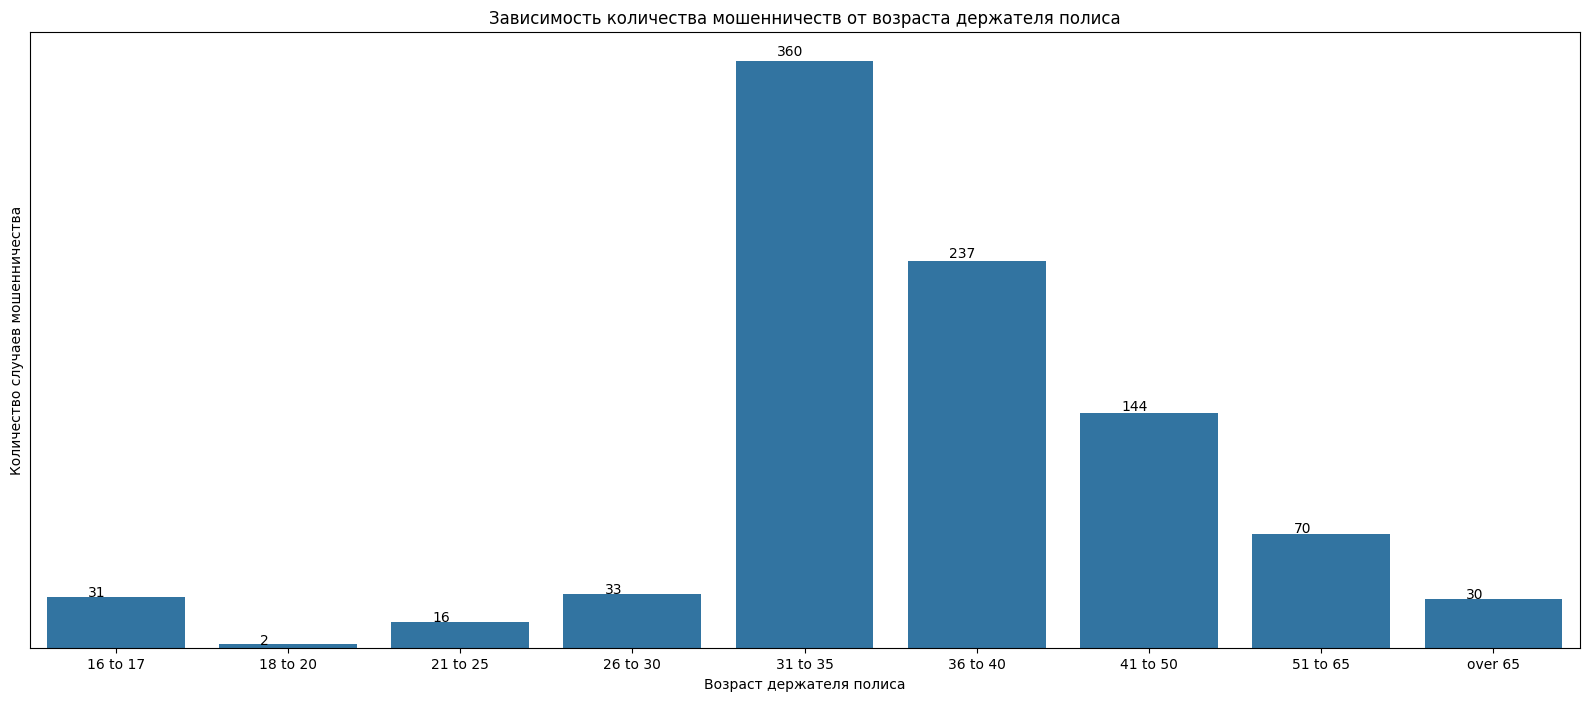

In [8]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Зависимость количества мошенничеств от возраста\
 держателя полиса")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Возраст держателя полиса")
plt.ylabel("Количество случаев мошенничества")
plt.yticks([])
plt.show()

### Большинство случаев мошенничества наблюдается в возрастной группе 31-35 лет, в то время как наименьшее количество случаев приходится на возрастную группу 18-20 лет.

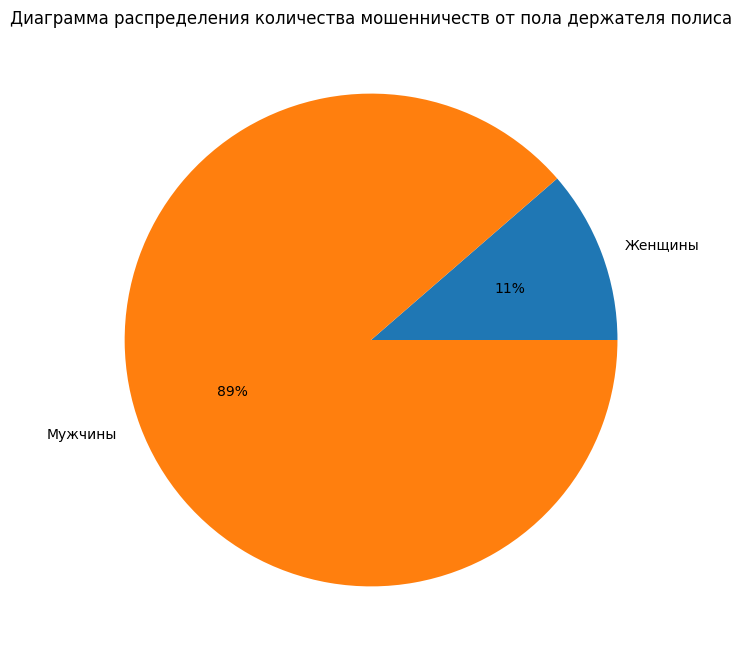

In [9]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Диаграмма распределения количества \
мошенничеств от пола держателя полиса")

plt.pie(gender.values, labels=['Женщины', 'Мужчины'],  autopct='%.0f%%')

plt.show()

### Среди мужчин случаи мошенничества встречается чаще, чем среди женщин.

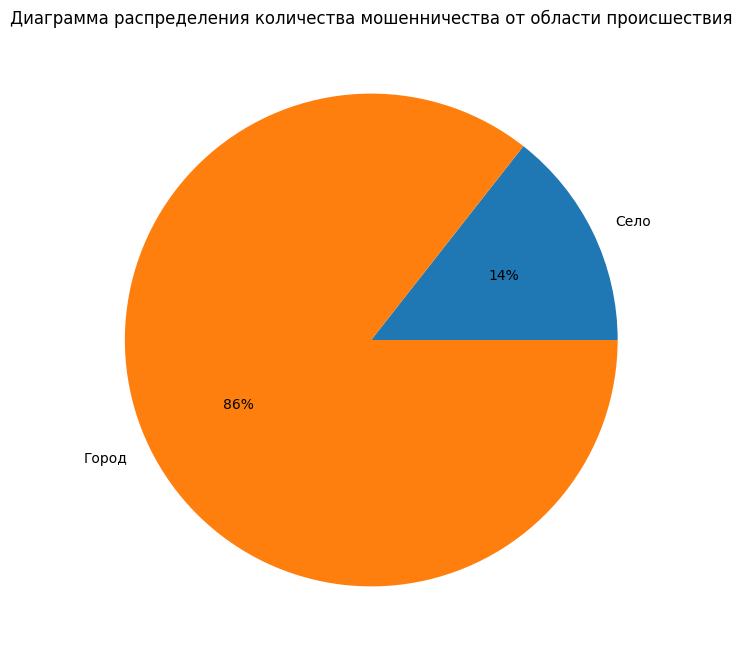

In [10]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Диаграмма распределения количества \
мошенничества от области происшествия")

plt.pie(accidentArea.values,labels=['Село', 'Город'],  autopct='%.0f%%')

plt.show()

### Случаи мошенничества чаще наблюдаются в городских районах, чем в сельских.

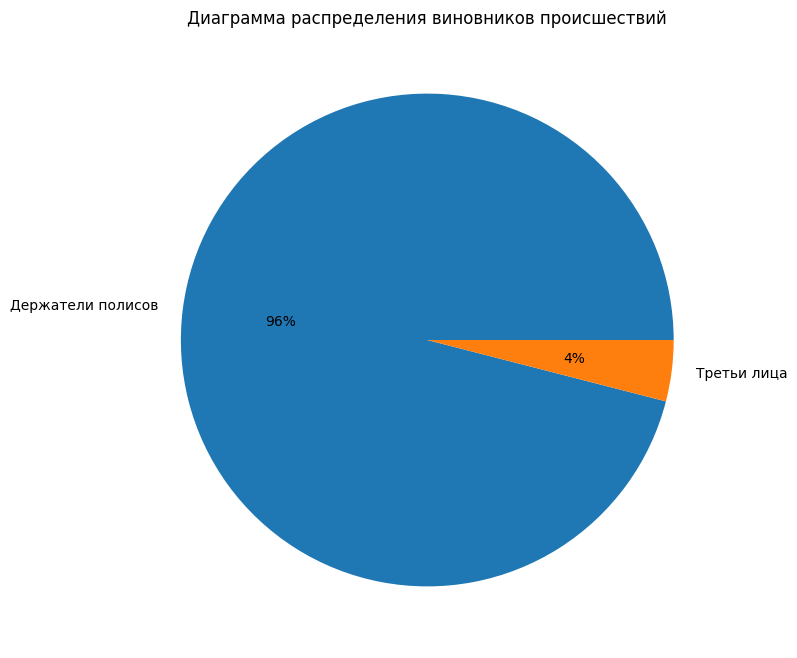

In [11]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Диаграмма распределения виновников \
происшествий")
plt.pie(fault.values,labels=['Держатели полисов', 'Третьи лица'],  autopct='%.0f%%')
plt.show()

### Очевидно, что мошенничество чаще совершают держатели полисов.

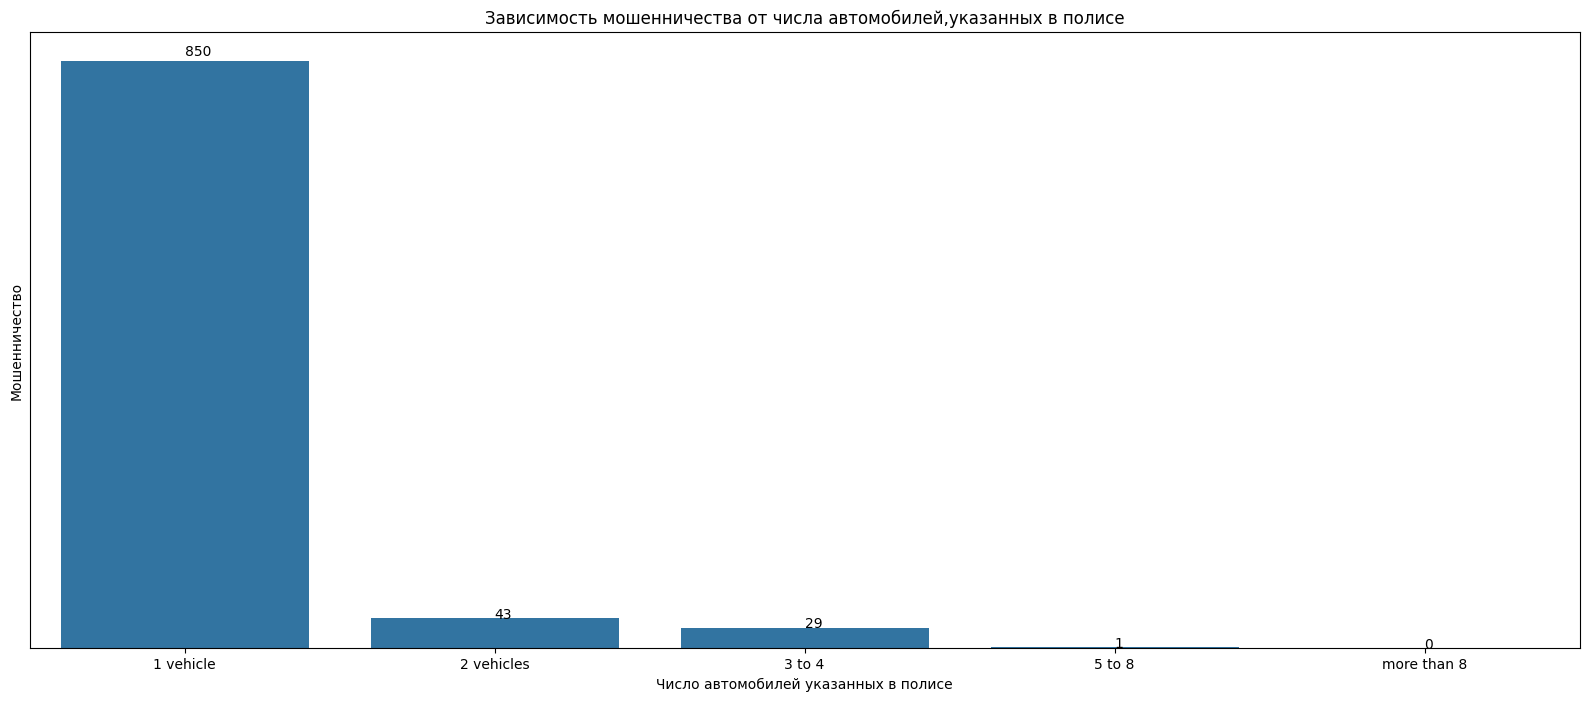

In [12]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Зависимость мошенничества от числа \
автомобилей,указанных в полисе")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Число автомобилей указанных в полисе")
plt.ylabel("Мошенничество")
plt.yticks([])
plt.show()

### Чаще всего мошенничество происходит, когда в происшествии участвует только одно транспортное средство.

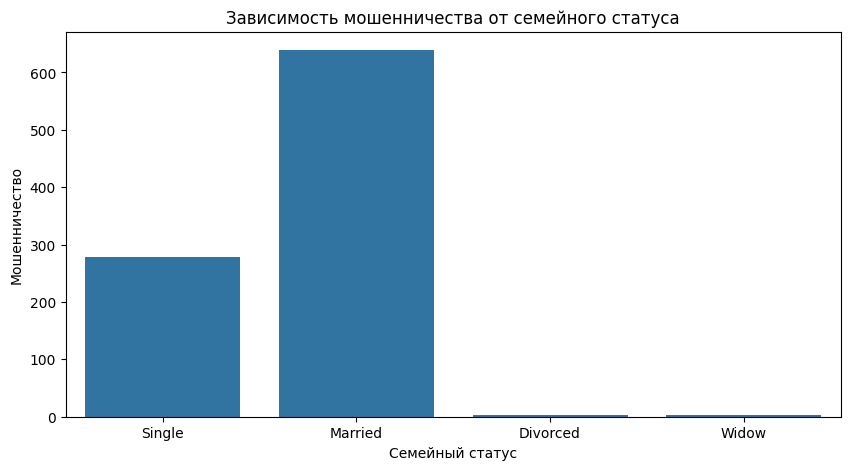

In [13]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Зависимость мошенничества \
от семейного статуса")
sns.countplot(x=fraud['MaritalStatus'])
plt.xlabel("Семейный статус")
plt.ylabel("Мошенничество");

### Женатые люди чаще оказываются вовлечены в случаи мошенничества.

In [14]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

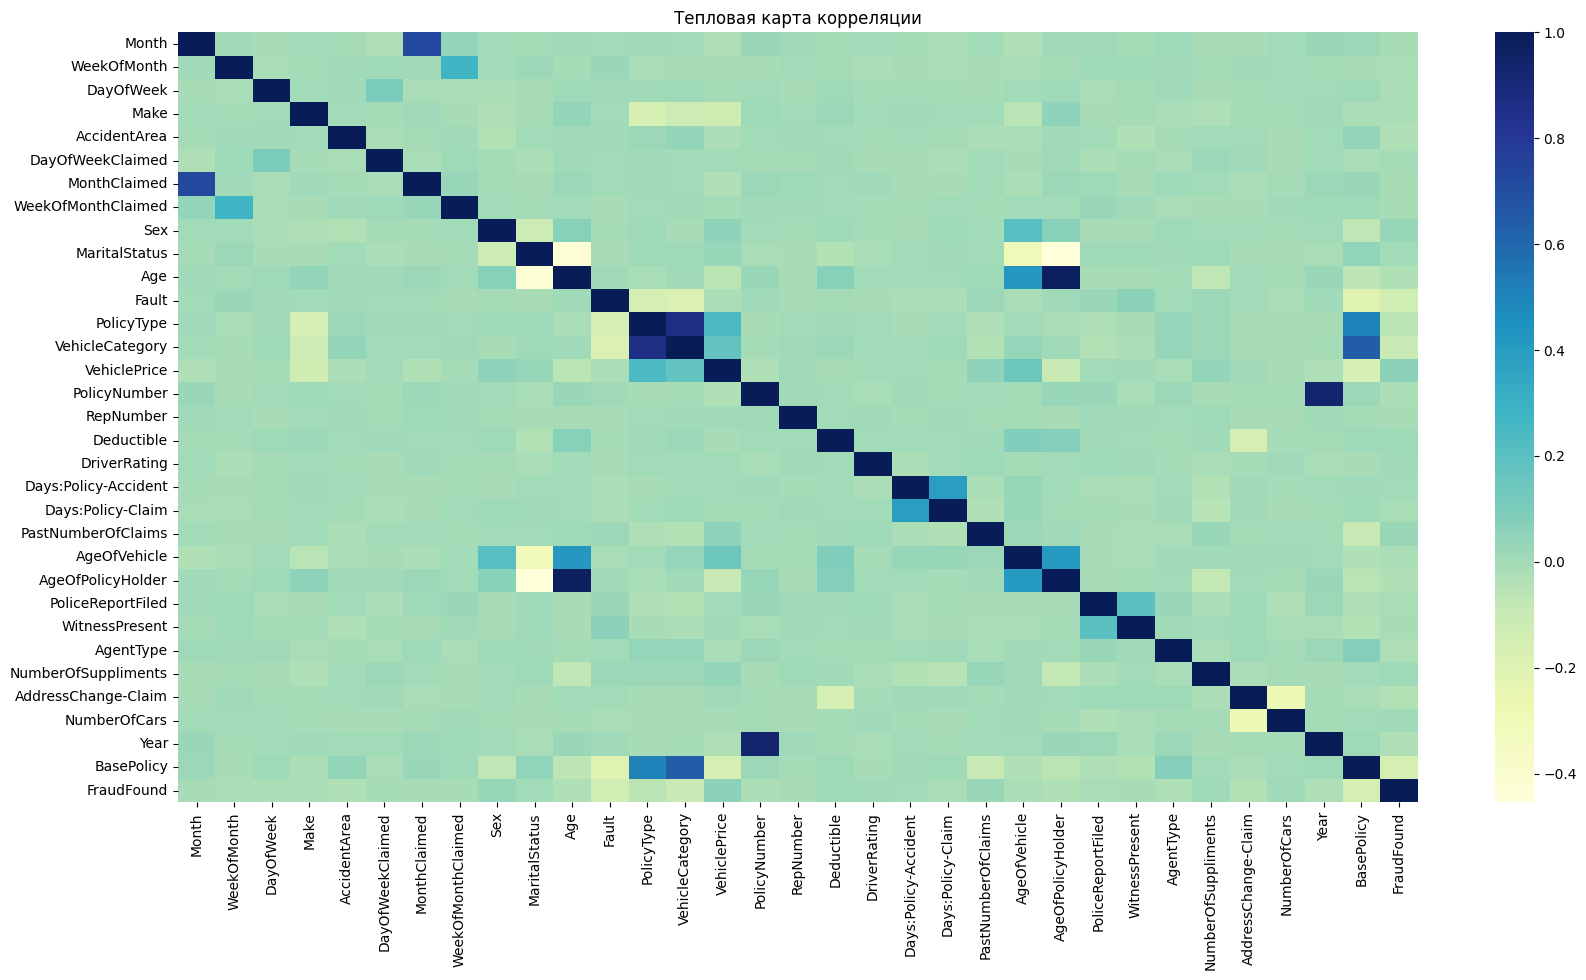

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Тепловая карта корреляции")
plt.show()

### Заметна сильная корреляция между некоторыми признаками, значит можно игнорировать одно из двух взаимнокоррелирующих признаков

In [16]:
df_new = df[['AccidentArea','Sex',\
       'MaritalStatus','Fault','Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

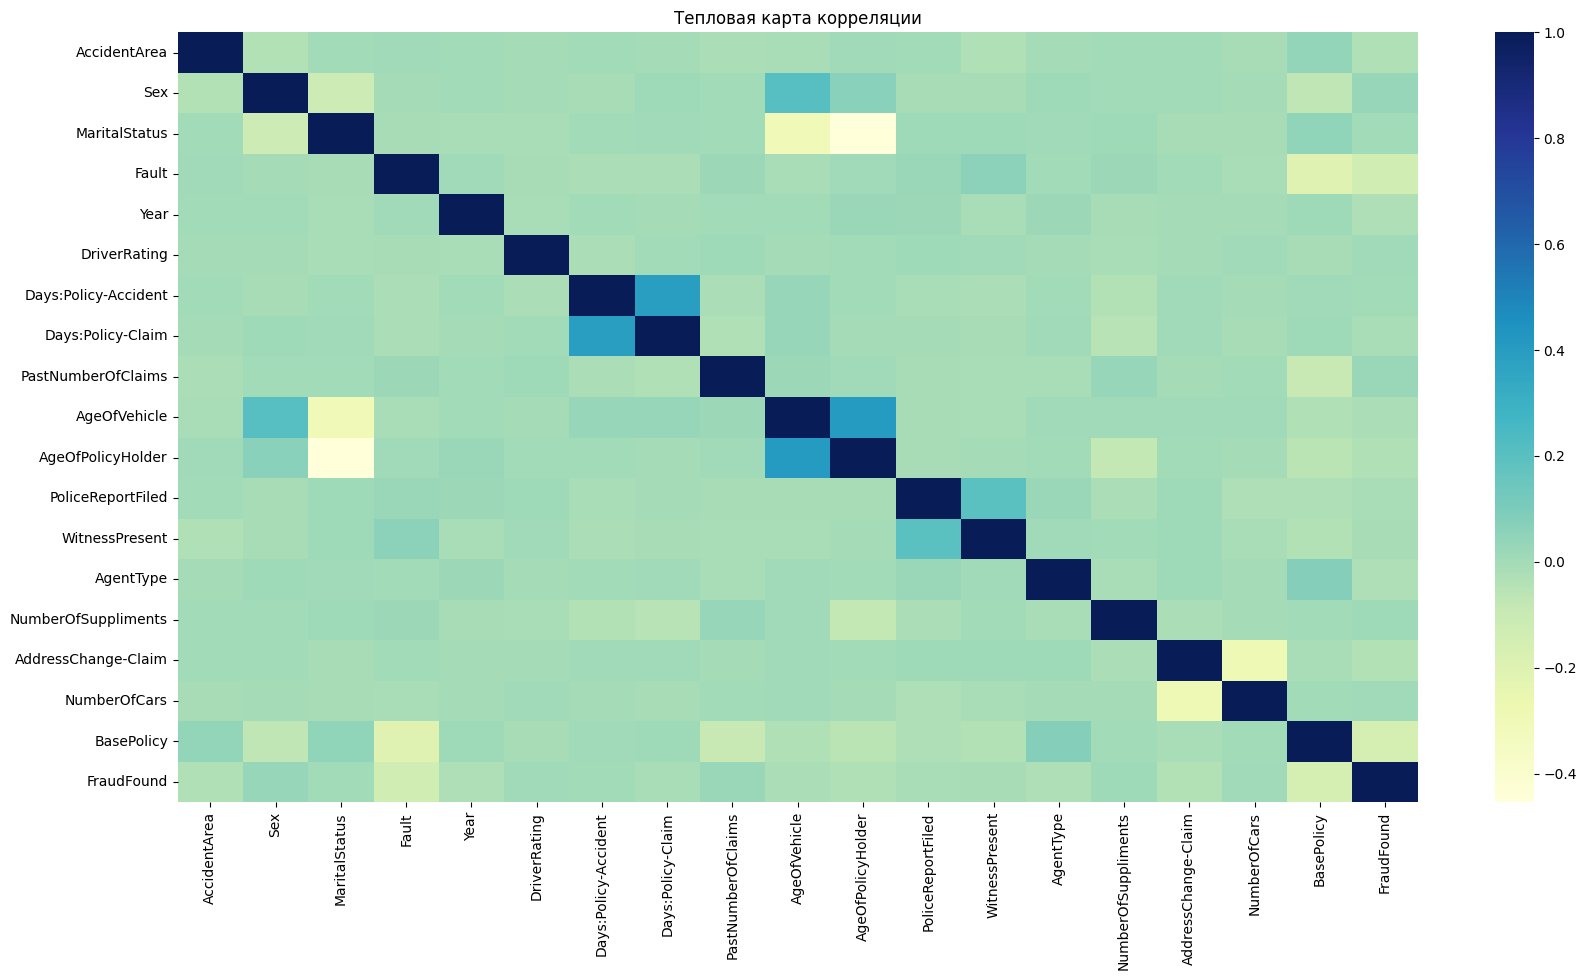

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("Тепловая карта корреляции")
plt.show()

In [18]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))
    
    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

## Определение наборов данных для обучения и тестирования

In [19]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 18), (3855, 18), (11565, 1), (3855, 1))

## Случайный лес

In [20]:
n = df_new.FraudFound.value_counts()[0]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

FraudFound
0    14497
1    14497
Name: count, dtype: int64

In [21]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21745, 18), (7249, 18), (21745, 1), (7249, 1))

Точность классификации:		97%


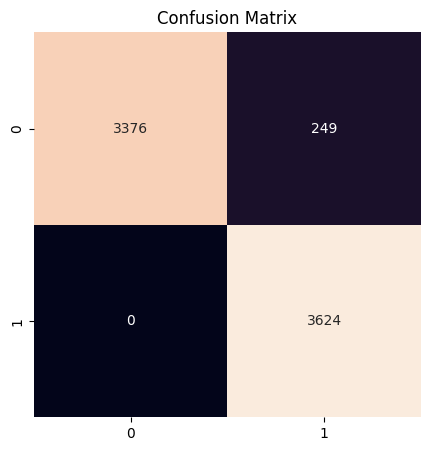

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print(f"Точность классификации:\t\t{acc_rfc_upscale*100:.0f}%")
conf_matrix(y_test,rfc_upscale_pred)